In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
print(os.listdir("Dataset\Apple"))

['Black_rot', 'Cedar_apple_rust', 'Healthy', 'Scab']


In [3]:
SIZE = 256

In [4]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("Dataset\Apple\Black_rot"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Dataset\Apple\Cedar_apple_rust"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Dataset\Apple\Healthy"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Dataset\Apple\Scab"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Black_rot
Dataset\Apple\Black_rot\0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG
Dataset\Apple\Black_rot\00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG
Dataset\Apple\Black_rot\0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG
Dataset\Apple\Black_rot\0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE.S 3079.JPG
Dataset\Apple\Black_rot\01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG
Dataset\Apple\Black_rot\02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948.JPG
Dataset\Apple\Black_rot\02186b4f-a9e1-4d19-ae3d-6cfb0f4b106a___JR_FrgE.S 2828.JPG
Dataset\Apple\Black_rot\02859ed3-f56a-4315-82a5-c1cb72717225___JR_FrgE.S 8584.JPG
Dataset\Apple\Black_rot\028d1f49-303d-46b6-ae2b-50862fab78ca___JR_FrgE.S 2748.JPG
Dataset\Apple\Black_rot\032cf235-07ff-478f-b347-d55c07835bc5___JR_FrgE.S 8778.JPG
Dataset\Apple\Black_rot\033b1492-d5cf-4de7-a195-941f7780e092___JR_FrgE.S 8710.JPG
Dataset\Apple\Black_rot\03fd7154-2e33-4fb6-999d-bfc3a3f467fe___JR_FrgE.S 8681.JPG
Datase

In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
len(train_images), len(train_labels)

(3171, 3171)

In [7]:
#Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, train_size=0.8, shuffle=True)

In [8]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [9]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [11]:
x_train.shape

(2536, 256, 256, 3)

In [12]:
x_train_new = x_train.reshape(2536, 256*256*3)

In [13]:
x_train.shape, x_train_new.shape

((2536, 256, 256, 3), (2536, 196608))

In [14]:
# Train the model on training data
RF_model.fit(x_train_new, y_train_encoded) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [15]:
x_test.shape

(635, 256, 256, 3)

In [16]:
x_test_new = x_test.reshape(635, 256*256*3)

In [17]:
x_test_new.shape

(635, 196608)

In [18]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [19]:
#Print overall accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_RF)
print ("Accuracy = ", accuracy)

Accuracy =  0.8456692913385827


In [20]:
prediction_RF

array(['Healthy', 'Black_rot', 'Black_rot', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Scab', 'Healthy', 'Black_rot', 'Scab', 'Healthy', 'Healthy',
       'Healthy', 'Black_rot', 'Healthy', 'Healthy', 'Healthy',
       'Cedar_apple_rust', 'Healthy', 'Healthy', 'Black_rot', 'Scab',
       'Black_rot', 'Healthy', 'Healthy', 'Healthy', 'Scab', 'Healthy',
       'Cedar_apple_rust', 'Healthy', 'Healthy', 'Scab', 'Healthy',
       'Healthy', 'Healthy', 'Black_rot', 'Healthy', 'Black_rot', 'Scab',
       'Scab', 'Black_rot', 'Healthy', 'Scab', 'Healthy', 'Black_rot',
       'Healthy', 'Healthy', 'Scab', 'Scab', 'Scab', 'Healthy',
       'Black_rot', 'Scab', 'Scab', 'Healthy', 'Healthy', 'Scab',
       'Black_rot', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Cedar_apple_rust', 'Healthy', 'Healthy', 'Black_rot',
       'Black_rot', 'Healthy', 'Healthy', 'Black_rot', 'Scab', 'Healthy',
       'Healthy', 'Bl

<AxesSubplot:>

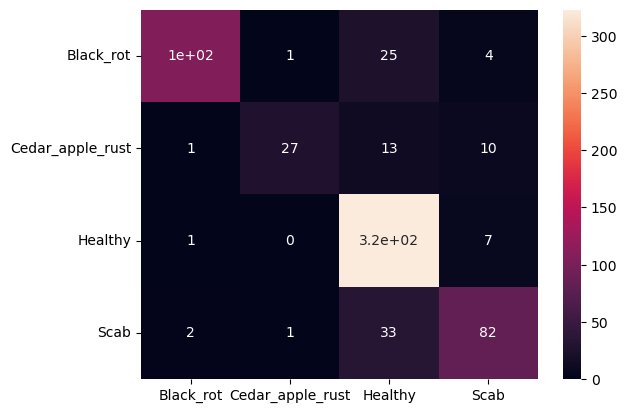

In [21]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
labels = ["Black_rot", "Cedar_apple_rust", "Healthy", "Scab"]
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [22]:
cm

array([[105,   1,  25,   4],
       [  1,  27,  13,  10],
       [  1,   0, 323,   7],
       [  2,   1,  33,  82]], dtype=int64)

The prediction for this image is:  ['Healthy']
The actual label for this image is:  Healthy
Label: 2


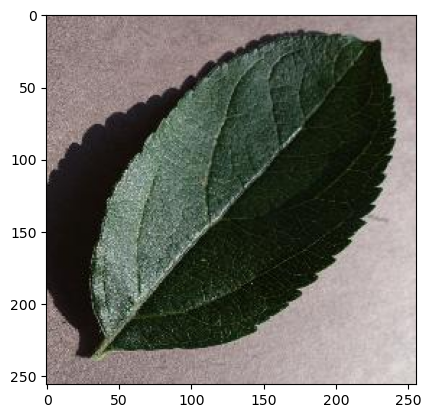

In [23]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=55 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction_RF = RF_model.predict(x_test_new)[0] 
label = prediction_RF
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])
print("Label:", label)

In [24]:
#Black Rot = 0
#Cedar Apple Rust = 1
#Healthy = 2
#Scab = 3